In [1]:
import pandas as pd

# Load the preprocessed data
data = pd.read_csv("../data/preprocessed_data.csv")
print(data.info())


C:\Users\Admin\AppData\Local\Temp\ipykernel_11024\1233646363.py:4: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/preprocessed_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [2]:
print(data.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                          0
NumberOfDoors               

In [3]:
from scipy.stats import f_oneway

# Group TotalClaims by Province
province_groups = [group['TotalClaims'] for _, group in data.groupby('Province')]

# Perform ANOVA
f_stat, p_value = f_oneway(*province_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant differences in risks accross provinces (Reject H₀).")
else:
    print("No significant differences in risks accross provinces (Fail to reject H₀).")

ANOVA F-statistic: 5.84941376240761
p-value: 1.6782057588675903e-07
Significant differences in risks accross provinces (Reject H₀).


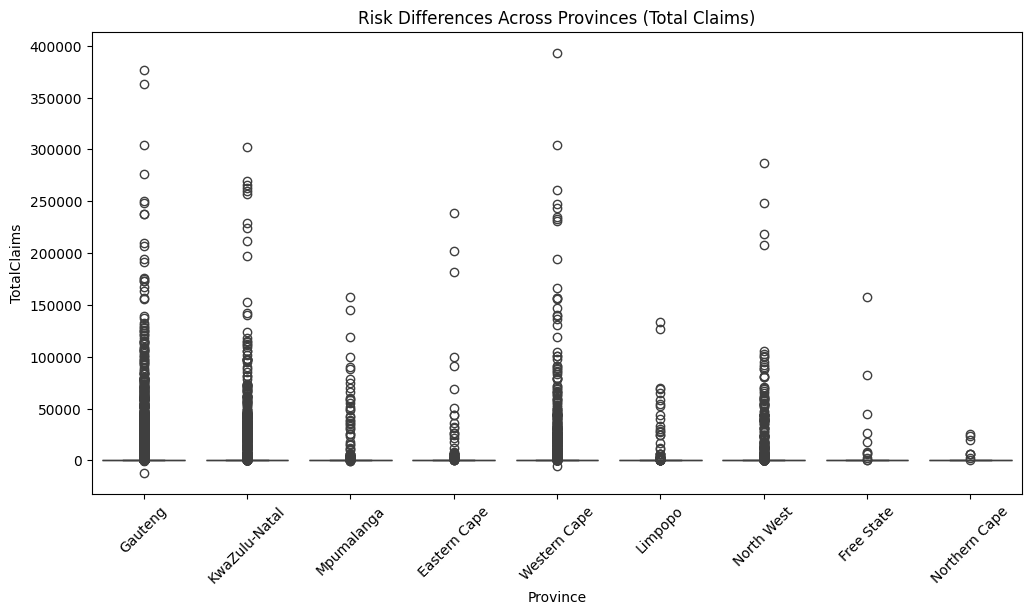

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of TotalClaims by Province
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Province', y='TotalClaims')
plt.title("Risk Differences Across Provinces (Total Claims)")
plt.xticks(rotation=45)
plt.show()